In [3]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [5]:
df = pd.read_csv(r'E:\ftn\python\data set\p Data set\Instagramdata.csv', encoding = "latin1")
df

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [6]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\Darshu\AppData\Local\Temp\ipykernel_216\3137608855.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Home'])


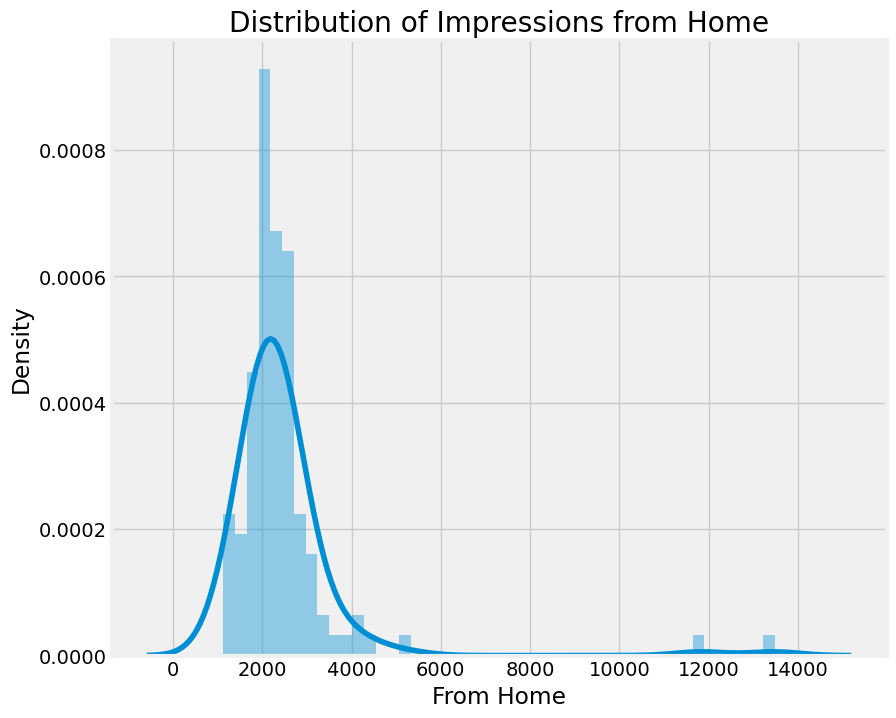

In [10]:
plt.figure(figsize = (10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Home")
sns.distplot(df['From Home'])
plt.show()

The impressions I get from the home section on Insta shows how much my post reached my followers. Looking at the impressions from the home, I can say 

C:\Users\Darshu\AppData\Local\Temp\ipykernel_216\390490391.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Hashtags'])


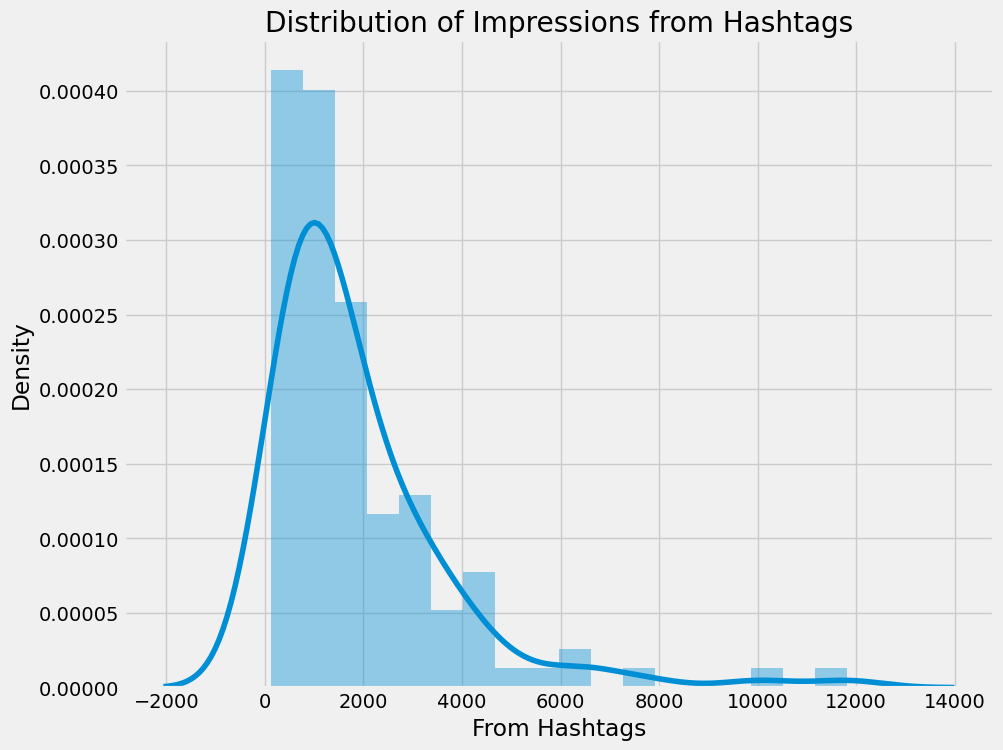

In [11]:
plt.figure(figsize = (10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(df['From Hashtags'])
plt.show()

C:\Users\Darshu\AppData\Local\Temp\ipykernel_216\1056746893.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Explore'])


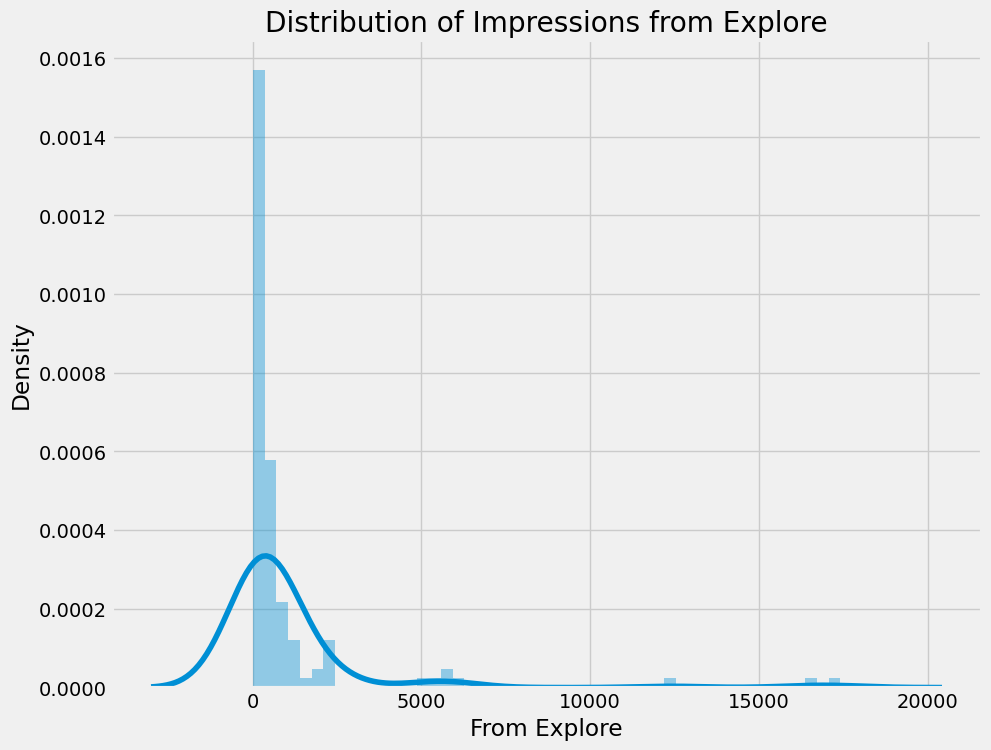

In [12]:
plt.figure(figsize = (10,8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of Impressions from Explore")
sns.distplot(df['From Explore'])
plt.show()

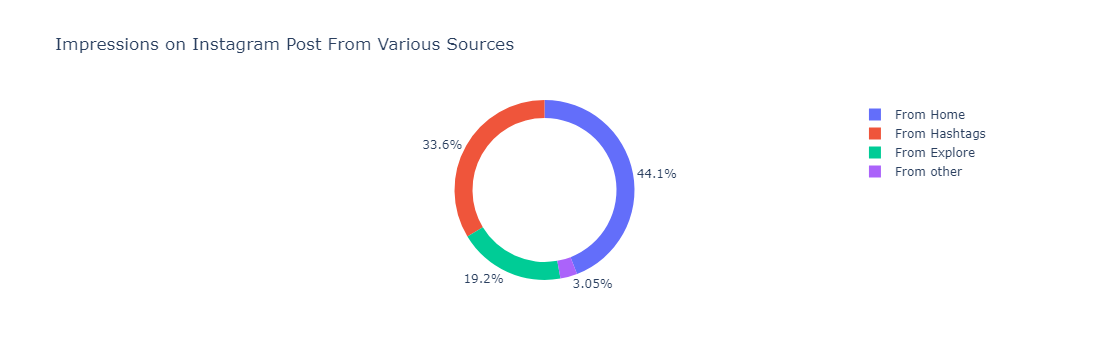

In [17]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()
labels = ["From Home", "From Hashtags", "From Explore", "From other"]
values = [home,hashtags,explore,other]
fig = px.pie(df, values = values, names = labels, title = "Impressions on Instagram Post From Various Sources", hole = 0.8)
fig.show()

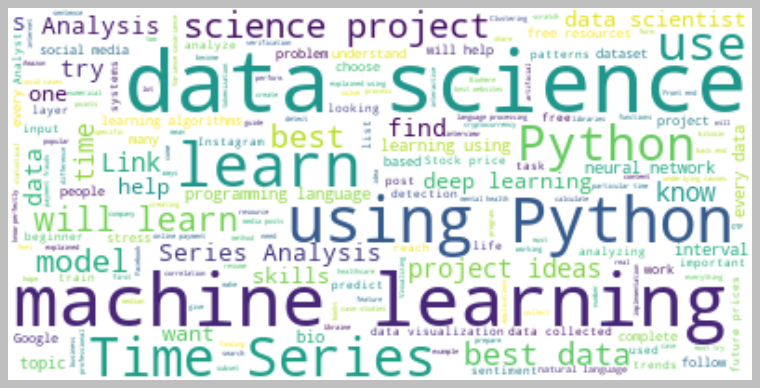

In [20]:
text = "".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.style.use("classic")
plt.figure(figsize = (12,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

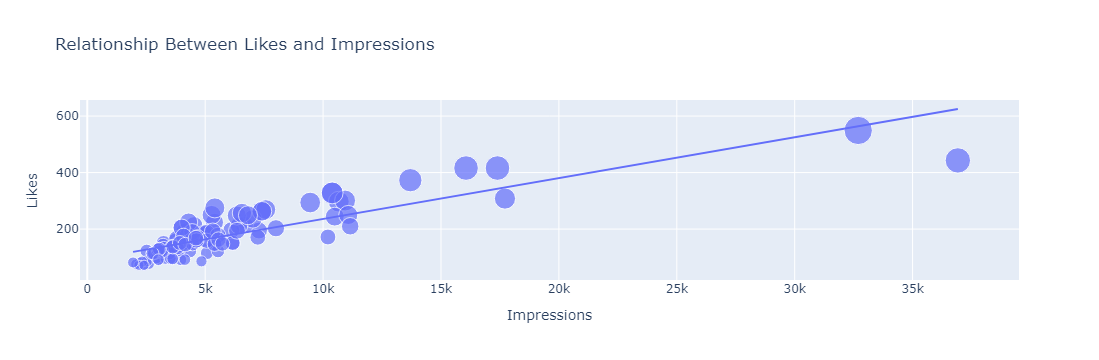

In [23]:
figure = px.scatter(data_frame = df, x = "Impressions", y = "Likes", size = "Likes", 
                    trendline = "ols", title = "Relationship Between Likes and Impressions")
figure.show()

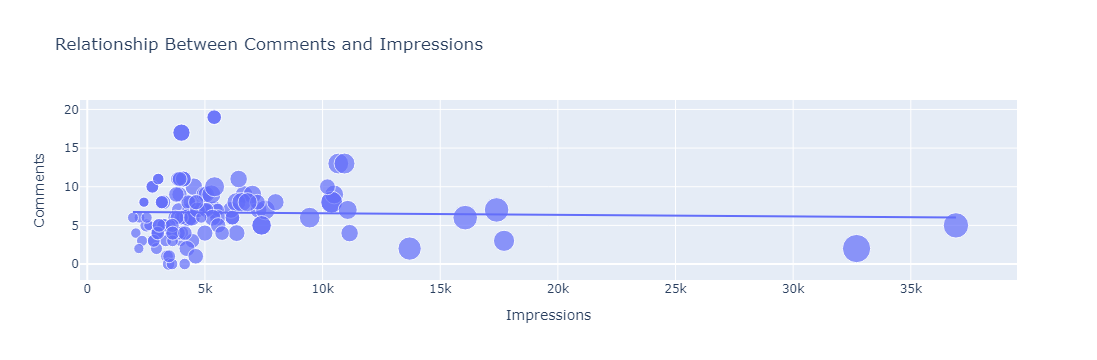

In [24]:
figure = px.scatter(data_frame = df, x = "Impressions", y = "Comments", size = "Likes", 
                    trendline = "ols", title = "Relationship Between Comments and Impressions")
figure.show()

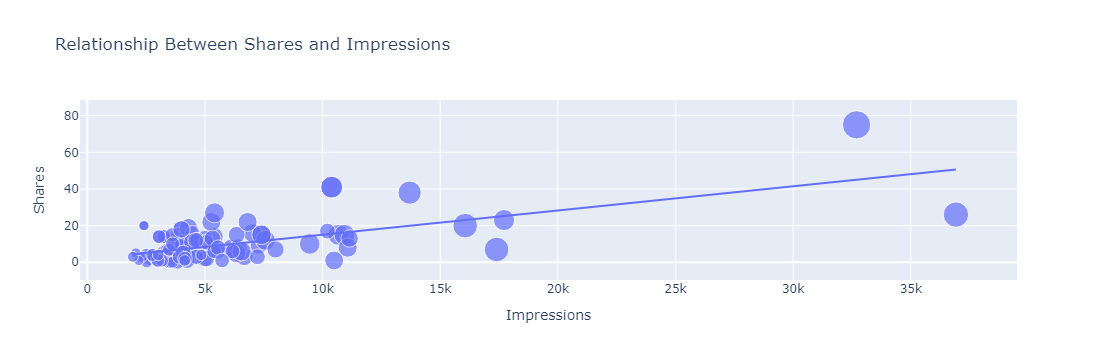

In [25]:
figure = px.scatter(data_frame = df, x = "Impressions", y = "Shares", size = "Likes", 
                    trendline = "ols", title = "Relationship Between Shares and Impressions")
figure.show()

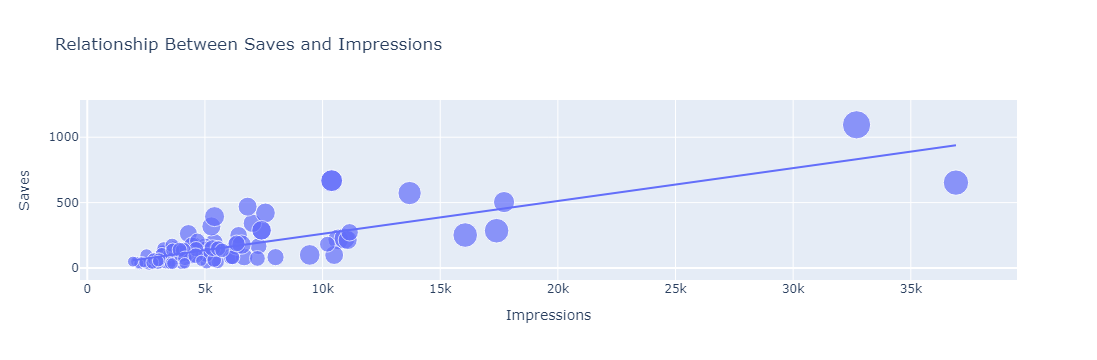

In [26]:
figure = px.scatter(data_frame = df, x = "Impressions", y = "Saves", size = "Likes", 
                    trendline = "ols", title = "Relationship Between Saves and Impressions")
figure.show()

In [32]:
insta_numeric = df.select_dtypes(include=[ny.number])
correlation = insta_numeric.corr()
correlation['Impressions'].sort_values(ascending = False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [35]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum())*100
conversion_rate

41.00265604249668

In [36]:
x = ny.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = ny.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 45)

In [38]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7265517509190123

In [40]:
features = ny.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(features)

array([10417.24529182])